In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [23]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import SimilarityMaps
import pandas as pd

from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.pyplot as plt
from io import BytesIO

In [74]:
# http://rdkit.blogspot.com/2020/04/new-drawing-options-in-202003-release.html
# https://sourceforge.net/p/rdkit/mailman/message/36011548/

#mol = Chem.MolFromSmiles('CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O')
#mol = Chem.MolFromSmiles(r'CN(C)[C@@H]1C(=O)/C(=C(\N)O)C(=O)[C@@]2(O)C(=O)C3=C(O)c4c(O)cccc4[C@@](C)(O)[C@H]3C[C@@H]12')
#mol = Chem.MolFromSmiles(r'CC(=O)O[C@@H]1[C@@H](SC2=CC=CC=C2N(C1=O)CCN(C)C)C3=CC=C(C=C3)OC')
#mol = Chem.MolFromSmiles(r'CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)C(=O)N2[C@H]1C(=O)O')
#mol = Chem.MolFromSmiles(r'O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O')
mol = Chem.MolFromSmiles(r'CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21')
#Draw.MolToFile(mol,'mol.png', size=(600, 600))
d2d = rdMolDraw2D.MolDraw2DCairo(600,600)
#d2d = rdMolDraw2D.MolDraw2DSVG(600,600)
opts = d2d.drawOptions()
opts.clearBackground=False
d2d.DrawMolecule(mol)
d2d.FinishDrawing()
#SVG(d2d.GetDrawingText())
with open('mol.png','wb') as f:
    f.write(d2d.GetDrawingText())

In [57]:
mol = Chem.MolFromSmiles('CCOC(=O)C1=CC=C(C=C1)O')

In [58]:
bi = {}
#fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048, bitInfo=bi)
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048, bitInfo=bi) # radius = 2, 4, 6 <-
onbits = list(fp.GetOnBits())[:]
# show 10 of the set bits:
#onbits = list(fp.GetOnBits())[:]

In [59]:
print(onbits)
print(bi)

[57, 80, 145, 147, 231, 294, 480, 593, 606, 650, 695, 745, 759, 807, 1057, 1238, 1313, 1380, 1385, 1396, 1522, 1602, 1697, 1722, 1750, 1778, 1873, 1875, 1917]
{57: ((5, 3),), 80: ((1, 0),), 145: ((3, 1),), 147: ((2, 1),), 231: ((8, 3),), 294: ((0, 1),), 480: ((2, 3),), 593: ((3, 3),), 606: ((5, 2),), 650: ((4, 0),), 695: ((2, 0),), 745: ((8, 1),), 759: ((2, 2),), 807: ((3, 0), (11, 0)), 1057: ((0, 0),), 1238: ((1, 1),), 1313: ((7, 2), (9, 2)), 1380: ((5, 0), (8, 0)), 1385: ((5, 1),), 1396: ((6, 3),), 1522: ((3, 2),), 1602: ((11, 1),), 1697: ((6, 2), (10, 2)), 1722: ((1, 2),), 1750: ((6, 1), (7, 1), (9, 1), (10, 1)), 1778: ((8, 2),), 1873: ((6, 0), (7, 0), (9, 0), (10, 0)), 1875: ((7, 3),), 1917: ((4, 1),)}


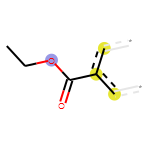

In [60]:
Draw.DrawMorganBit(mol, 480, bi)

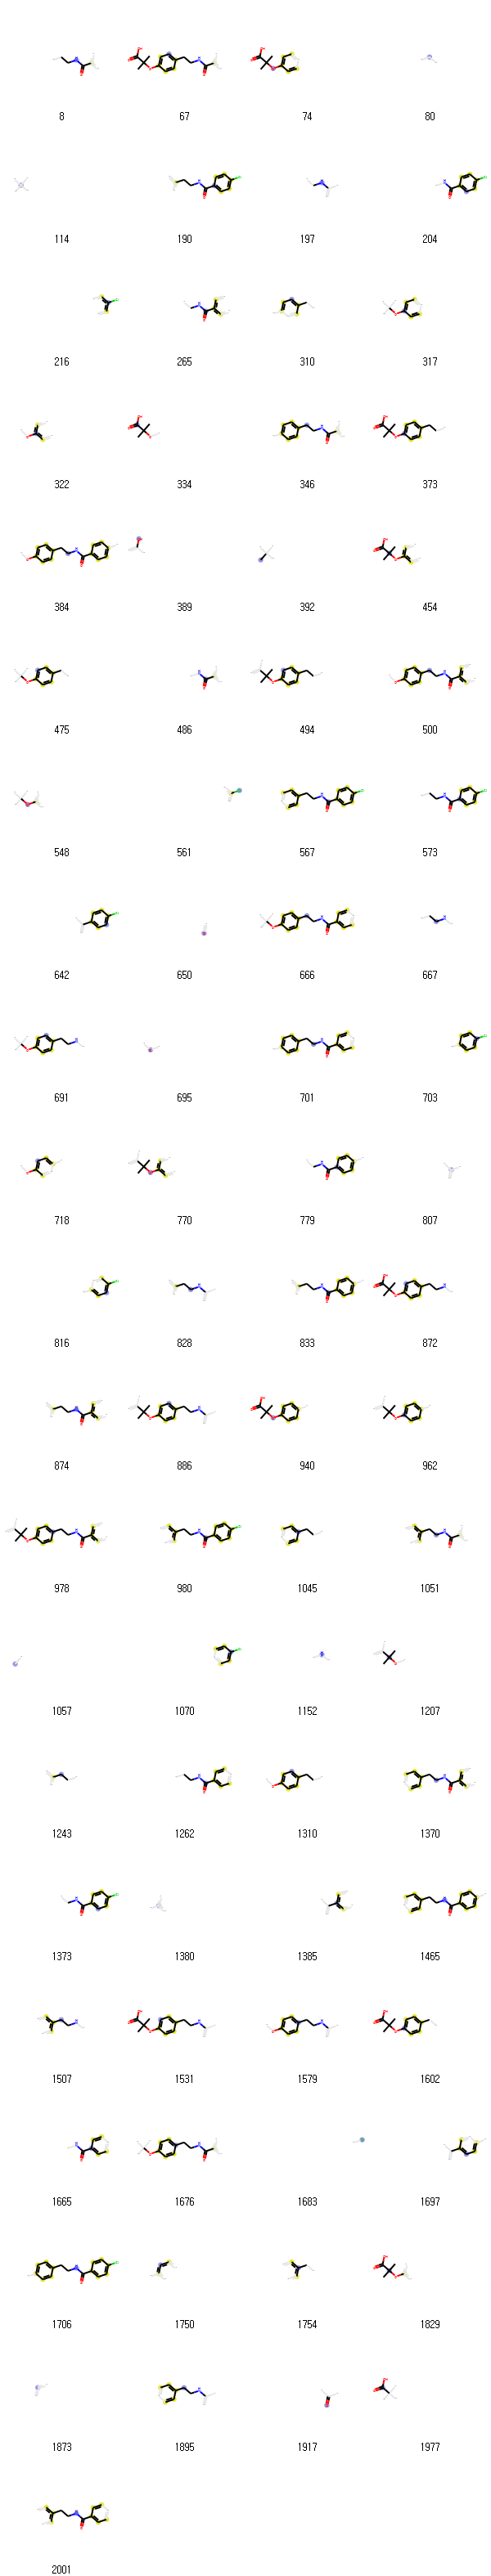

In [9]:
tpls = [(mol,x,bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(tpls[:],molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()][:])

In [10]:
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))

In [12]:
interact(renderFpBit, bitIdx=list(bi.keys()),mol=fixed(mol),
         bitInfo=fixed(bi),fn=fixed(Draw.DrawMorganBit));

interactive(children=(Dropdown(description='bitIdx', options=(8, 67, 74, 80, 114, 190, 197, 204, 216, 265, 310…

In [99]:
mol = Chem.MolFromSmiles('CC(=O)NC1=CC=C(C=C1)O')

In [100]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, fpSize=2048, minPath=1, maxPath=7, bitInfo=rdkbi)
# show 10 of the set bits:
list(rdkfp.GetOnBits())[:10]

[29, 50, 52, 64, 76, 83, 103, 112, 150, 161]

In [101]:
print(rdkfp.GetNumOnBits(),len(rdkbi))

168 168


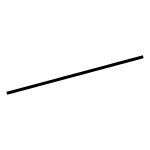

In [102]:
Draw.DrawRDKitBit(mol, 1772, rdkbi)

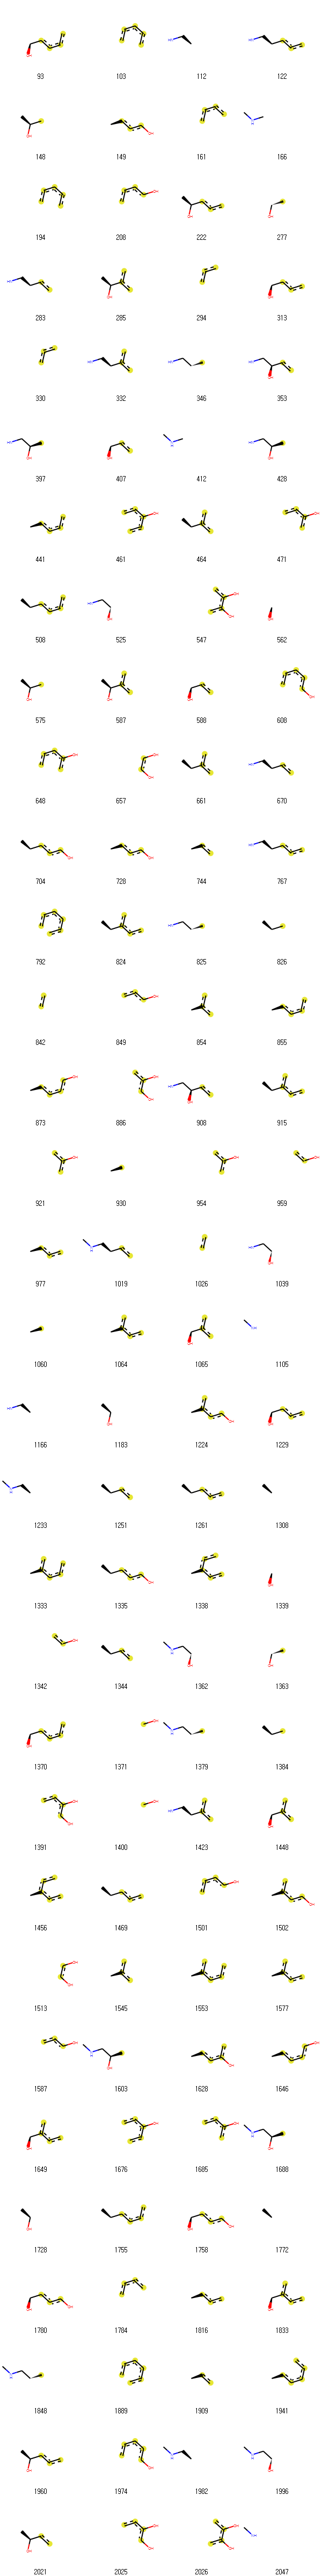

In [28]:
tpls = [(epinephrine,x,rdkbi) for x in rdkbi]
Draw.DrawRDKitBits(tpls[:],molsPerRow=4,legends=[str(x) for x in rdkbi][:])

In [29]:
interact(renderFpBit, bitIdx=list(rdkbi.keys()),mol=fixed(epinephrine),
         bitInfo=fixed(rdkbi),fn=fixed(Draw.DrawRDKitBit));

interactive(children=(Dropdown(description='bitIdx', options=(93, 103, 112, 122, 148, 149, 161, 166, 194, 208,…

In [31]:
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

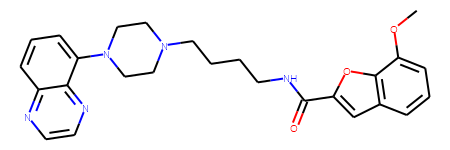

In [33]:
mol

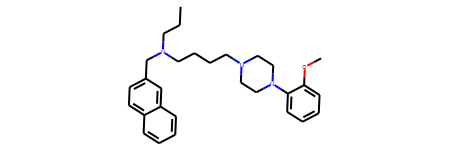

In [34]:
refmol

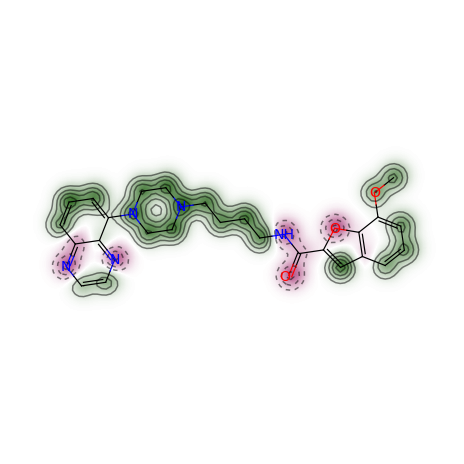

In [35]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetAPFingerprint)

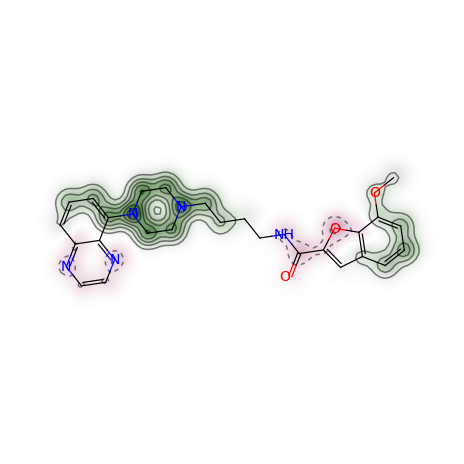

In [36]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetTTFingerprint)

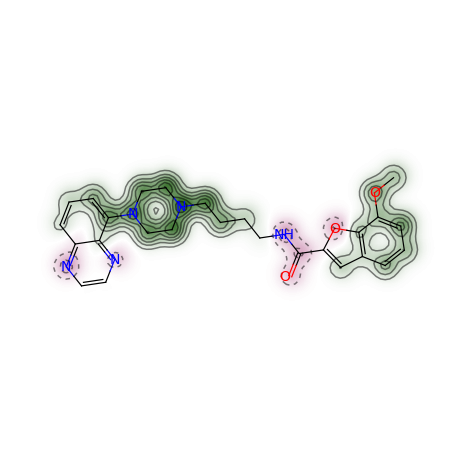

In [43]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

In [3]:
df_smiles = pd.read_csv('new_list_2.csv', index_col='no')

In [7]:
#mol = Chem.MolFromSmiles(df_smiles['SMILES'].iloc[164])
mol = Chem.MolFromSmiles('BrC(Br)Br')
d2d = rdMolDraw2D.MolDraw2DCairo(700,700)
opts = d2d.drawOptions()
opts.clearBackground = False

AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, contourLines=10, draw2d=d2d)

opts = d2d.drawOptions()
opts.clearBackground = False

d2d.FinishDrawing()
# #SVG(d2d.GetDrawingText())
with open('mol_charge.png','wb') as f:
    f.write(d2d.GetDrawingText())